## Thực hiện lại bài thực hành

Đọc và hiểu cấu trúc dữ liệu

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
Y = iris.target

In [36]:
X.shape

(150, 2)

Phân chia dữ liệu

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

Huấn luyện và dự đoán

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
Y_pred = model.predict(X_test)

Đánh giá khả năng dự đoán của mô hình

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

96.66666666666667

Bài 1: Hãy thống kê số lượng nhãn (label) trên tập training và tập test vừa chia. Vẽ
biểu đồ phân bố nhãn (Gợi ý: sử dụng barplot trong thư viện seaborn)

<Axes: >

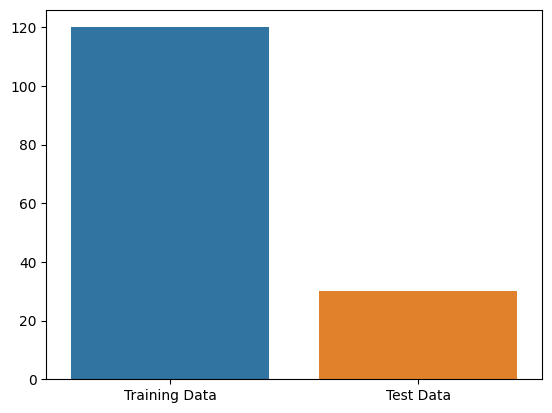

In [41]:
from seaborn import barplot
barplot(x=['Training Data', 'Test Data'], y=[X_train.shape[0], X_test.shape[0]])


Bài 2: Thực hiện huấn luyện mô hình Logistic Regression trên bộ dữ liệu (tham khảo
theo các bước đã hướng dẫn)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

96.66666666666667

Bài 3: Thực hiện huấn luyện mô hình K láng giềng gần nhất (KNN) trên bộ dữ liệu,
sau đó so sánh độ chính xác (Accuracy) với mô hình LogisticRegression

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_score(Y_test, Y_pred_knn)*100  

96.66666666666667

=> Độ chính xác của 2 mô hình là tương đương nhau

Bài 4: Đánh giá 2 mô hình vừa xây dựng trên 3 độ đo sau: precision_score,
recall_score và f1_score sử dụng macro average

LogisticRegression:

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score:" ,precision_score(Y_test, Y_pred, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test, Y_pred, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test, Y_pred, average= "macro")*100)

Precision score: 95.83333333333334
Recall score: 97.43589743589745
F1 score: 96.44444444444446


KNN:


In [45]:
print("Precision score:" ,precision_score(Y_test, Y_pred_knn, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test, Y_pred_knn, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test, Y_pred_knn, average= "macro")*100)

Precision score: 95.83333333333334
Recall score: 97.43589743589745
F1 score: 96.44444444444446


Bài 5*: Hãy sử dụng chiến lược tinh chỉnh tham số GridSearchCV để tìm ra bộ tham
số tốt nhất cho mô hình Logistic Regression. So sánh kết quả với mô hình gốc.

In [46]:
from sklearn.model_selection import GridSearchCV
#grid search for logistic regression
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000]}
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, Y_train)
grid_search.best_params_


c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was

{'C': 0.1, 'max_iter': 500, 'penalty': 'none', 'solver': 'sag'}

In [47]:
log_tune = LogisticRegression(C= 0.5, max_iter= 100, penalty= 'l2', solver= 'newton-cg')
log_tune.fit(X_train, Y_train)
Y_pred_log_tune = log_tune.predict(X_test)
accuracy_score(Y_test, Y_pred_log_tune)*100

96.66666666666667

=> Kết quả tốt hơn mô hình gốc nhưng không nhiều

Bài 6**: Hãy thực hiện các bước tương tự gồm: đọc dữ liệu, thống kê số nhãn, số
thuộc tính trong bộ dữ liệu, chia thành tập train và tập test, và huấn luyện mô hình với
bộ dữ liệu Breast Cancer Wisconsin.

In [48]:
#import dataset from /archive/data.csv
import pandas as pd
bai6 = pd.read_csv("D:\\UIT\\data.csv")


In [49]:
drop_cols = ['Unnamed: 32','id']
bai6 = bai6.drop(drop_cols, axis=1)

In [50]:
bai6['diagnosis'] = bai6['diagnosis'].map({'M':1,'B':0})

In [51]:
X_bai6 = bai6.drop(['diagnosis'], axis = 1)
y_bai6 = bai6['diagnosis']
model_bai6 = LogisticRegression()

In [52]:
X_train_bai6, X_test_bai6, Y_train_bai6, Y_test_bai6 = train_test_split(X_bai6, y_bai6, test_size=0.2)

In [53]:
model_bai6.fit(X_train_bai6, Y_train_bai6)
y_pred_brcw = model_bai6.predict(X_test_bai6)
print("Accuracy score: ", accuracy_score(Y_test_bai6, y_pred_brcw)*100)
print("Precision score:" ,precision_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)

Accuracy score:  95.6140350877193
Precision score: 96.0397830018083
Recall score: 94.07894736842105
F1 score: 94.96243923994697


c:\Users\Phat Thanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
